In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [3]:
super = pd.read_csv("Super C19.csv")
super = super.drop('Unnamed: 0', axis = 1)

In [4]:
Arizona = super[super.State == "AZ"]

AZdates = Arizona.drop(Arizona.columns[[0, 1, 2, 3, 4, 5, 6, -1]], axis=1).sum()

In [5]:
# Generating data for Arizona

AZ_Cases = []
AZ_Deaths = []
for i in range(len(AZdates.keys())):
    if str(AZdates.keys()[i][11:13]) != "2d":
        AZ_Cases.append(AZdates[i])
    else:
        AZ_Deaths.append(AZdates[i])

#Getting the new cases and deaths
NewAZ_Cases = []
for i in reversed(range(len(AZ_Cases))):
    ANC = AZ_Cases[i] - AZ_Cases[i - 1]
    if (ANC < 0):
        ANC = 0
    NewAZ_Cases.insert(0, ANC)

NewAZ_Deaths = []
for i in reversed(range(len(AZ_Deaths))):
    AND = AZ_Deaths[i] - AZ_Deaths[i - 1]
    if (AND < 0):
        AND = 0
    NewAZ_Deaths.insert(0, AND)

NewAZ_Cases.pop(0)
NewAZ_Deaths.pop(0)

0

In [6]:
# Generating data for Maricopa

Mari = Arizona[Arizona.countyFIPS == 4013]
Maridates = Mari.drop(Mari.columns[[0, 1, 2, 3, 4, 5, 6, -1]], axis=1).sum()

Mari_Cases = []
Mari_Deaths = []
for i in range(len(Maridates.keys())):
    if str(Maridates.keys()[i][11:13]) != "2d":
        Mari_Cases.append(Maridates[i])
    else:
        Mari_Deaths.append(Maridates[i])

#Getting the new cases and deaths
NewMari_Cases = []
for i in reversed(range(len(Mari_Cases))):
    MNC = Mari_Cases[i] - Mari_Cases[i - 1]
    if (MNC < 0):
        MNC = 0
    NewMari_Cases.insert(0, MNC)

NewMari_Deaths = []
for i in reversed(range(len(Mari_Deaths))):
    MND = Mari_Deaths[i] - Mari_Deaths[i - 1]
    if (MND < 0):
        MND = 0
    NewMari_Deaths.insert(0, MND)

NewMari_Cases.pop(0)
NewMari_Deaths.pop(0)

0

In [7]:
# Generating data for Pima

Pima = Arizona[Arizona.countyFIPS == 4019]
Pimadates = Pima.drop(Pima.columns[[0, 1, 2, 3, 4, 5, 6, -1]], axis=1).sum()

Pima_Cases = []
Pima_Deaths = []
for i in range(len(Pimadates.keys())):
    if str(Pimadates.keys()[i][11:13]) != "2d":
        Pima_Cases.append(Pimadates[i])
    else:
        Pima_Deaths.append(Pimadates[i])

#Getting the new cases and deaths
NewPima_Cases = []
for i in reversed(range(len(Pima_Cases))):
    PNC = Pima_Cases[i] - Pima_Cases[i - 1]
    if (PNC < 0):
        PNC = 0
    NewPima_Cases.insert(0, PNC)

NewPima_Deaths = []
for i in reversed(range(len(Pima_Deaths))):
    PND = Pima_Deaths[i] - Pima_Deaths[i - 1]
    if (PND < 0):
        PND = 0
    NewPima_Deaths.insert(0, PND)

NewPima_Cases.pop(0)
NewPima_Deaths.pop(0)

0

In [8]:
# Generating data for Pinal

Pinal = Arizona[Arizona.countyFIPS == 4021]
Pinaldates = Pinal.drop(Pinal.columns[[0, 1, 2, 3, 4, 5, 6, -1]], axis=1).sum()

Pinal_Cases = []
Pinal_Deaths = []
for i in range(len(Pinaldates.keys())):
    if str(Pinaldates.keys()[i][11:13]) != "2d":
        Pinal_Cases.append(Pinaldates[i])
    else:
        Pinal_Deaths.append(Pinaldates[i])

#Getting the new cases and deaths
NewPinal_Cases = []
for i in reversed(range(len(Pinal_Cases))):
    PNC = Pinal_Cases[i] - Pinal_Cases[i - 1]
    if (PNC < 0):
        PNC = 0
    NewPinal_Cases.insert(0, PNC)

NewPinal_Deaths = []
for i in reversed(range(len(Pinal_Deaths))):
    PND = Pinal_Deaths[i] - Pinal_Deaths[i - 1]
    if (PND < 0):
        PND = 0
    NewPinal_Deaths.insert(0, PND)

NewPinal_Cases.pop(0)
NewPinal_Deaths.pop(0)

0

In [9]:
# Generating data for Yuma

Yuma = Arizona[Arizona.countyFIPS == 4027]
Yumadates = Yuma.drop(Yuma.columns[[0, 1, 2, 3, 4, 5, 6, -1]], axis=1).sum()

Yuma_Cases = []
Yuma_Deaths = []
for i in range(len(Yumadates.keys())):
    if str(Yumadates.keys()[i][11:13]) != "2d":
        Yuma_Cases.append(Yumadates[i])
    else:
        Yuma_Deaths.append(Yumadates[i])

#Getting the new cases and deaths
NewYuma_Cases = []
for i in reversed(range(len(Yuma_Cases))):
    YNC = Yuma_Cases[i] - Yuma_Cases[i - 1]
    if (YNC < 0):
        YNC = 0
    NewYuma_Cases.insert(0, YNC)

NewYuma_Deaths = []
for i in reversed(range(len(Yuma_Deaths))):
    YND = Yuma_Deaths[i] - Yuma_Deaths[i - 1]
    if (YND < 0):
        YND = 0
    NewYuma_Deaths.insert(0, YND)

NewYuma_Cases.pop(0)
NewYuma_Deaths.pop(0)

0

In [10]:
# Generating data for Mohave

Mohave = Arizona[Arizona.countyFIPS == 4015]
Mohavedates = Mohave.drop(Mohave.columns[[0, 1, 2, 3, 4, 5, 6, -1]], axis=1).sum()

Mohave_Cases = []
Mohave_Deaths = []
for i in range(len(Mohavedates.keys())):
    if str(Mohavedates.keys()[i][11:13]) != "2d":
        Mohave_Cases.append(Mohavedates[i])
    else:
        Mohave_Deaths.append(Mohavedates[i])

#Getting the new cases and deaths
NewMohave_Cases = []
for i in reversed(range(len(Mohave_Cases))):
    MNC = Mohave_Cases[i] - Mohave_Cases[i - 1]
    if (MNC < 0):
        MNC = 0
    NewMohave_Cases.insert(0, MNC)

NewMohave_Deaths = []
for i in reversed(range(len(Mohave_Deaths))):
    MND = Mohave_Deaths[i] - Mohave_Deaths[i - 1]
    if (MND < 0):
        MND = 0
    NewMohave_Deaths.insert(0, MND)

NewMohave_Cases.pop(0)
NewMohave_Deaths.pop(0)

0

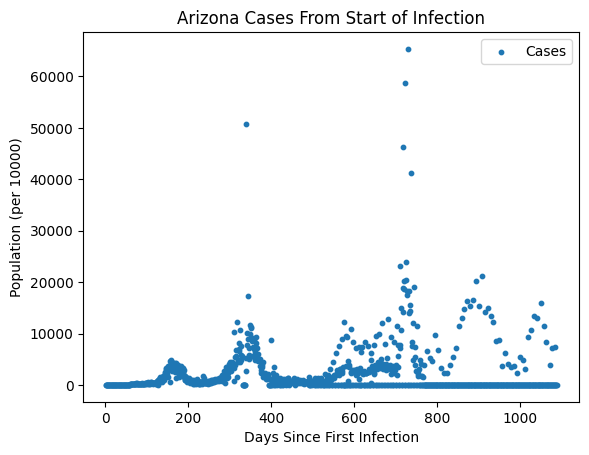

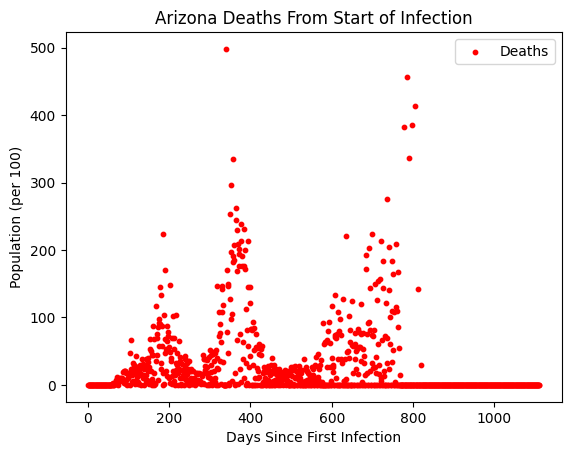

In [11]:
#Scatter plot for Arizona

AZcase_data = []
for i in range(len(NewAZ_Cases)):
    i += 1
    day_data = i
    AZcase_data.append(day_data)

AZdeath_data = []
for i in range(len(NewAZ_Deaths)):
    i += 1
    day_data = i
    AZdeath_data.append(day_data)

NewAZ_Cases = np.array(NewAZ_Cases)
NewAZ_Deaths = np.array(NewAZ_Deaths)
AZcase_data = np.array(AZcase_data)
AZdeath_data = np.array(AZdeath_data)

plt.scatter(AZcase_data, NewAZ_Cases, label='Cases', s = 10)
plt.legend()
plt.title("Arizona Cases From Start of Infection")
plt.xlabel("Days Since First Infection")
plt.ylabel("Population (per 10000)")
plt.show()

plt.scatter(AZdeath_data, NewAZ_Deaths, label='Deaths', c ="red", s = 10)
plt.legend()
plt.title("Arizona Deaths From Start of Infection")
plt.xlabel("Days Since First Infection")
plt.ylabel("Population (per 100)")
plt.show()

Linear and Non-Linear (Polynomial) Regression Models

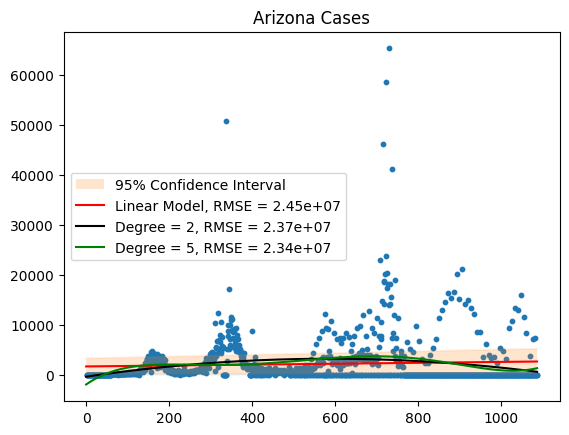

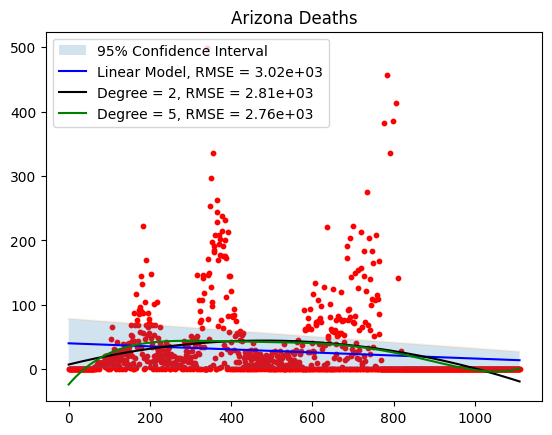

In [12]:
#Arizona Cases Linear and Nonlinear Regression Models
xCases = AZcase_data.reshape((-1, 1))
yCases = NewAZ_Cases

AZCmodel = LinearRegression().fit(xCases, yCases)
AZC1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xCases)
AZC2 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xCases)
AZCmodel1 = LinearRegression().fit(AZC1, yCases)
AZCmodel2 = LinearRegression().fit(AZC2, yCases)
y_pred = AZCmodel.predict(xCases)
y_pred1 = AZCmodel1.predict(AZC1)
y_pred2 = AZCmodel2.predict(AZC2)
x_test = np.linspace(0, 1087, 1087)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "red", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(AZCmodel.predict(xCases), yCases)))
plt.plot(x_test.ravel(), y_pred1, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(AZCmodel1.predict(AZC1), yCases)))
plt.plot(x_test.ravel(), y_pred2, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(AZCmodel2.predict(AZC2), yCases)))
plt.title("Arizona Cases")
plt.legend()
plt.show()

#Arizona Deaths Linear and Nonlinear Regression Models
xDeaths = AZdeath_data.reshape((-1, 1))
yDeaths = NewAZ_Deaths

AZD3 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xDeaths)
AZD4 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xDeaths)
AZDmodel = LinearRegression().fit(xDeaths, yDeaths)
AZDmodel3 = LinearRegression().fit(AZD3, yDeaths)
AZDmodel4 = LinearRegression().fit(AZD4, yDeaths)
y_pred = AZDmodel.predict(xDeaths)
y_pred3 = AZDmodel3.predict(AZD3)
y_pred4 = AZDmodel4.predict(AZD4)
x_test = np.linspace(0, 1110, 1110)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "blue", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(AZDmodel.predict(xDeaths), yDeaths)))
plt.plot(x_test.ravel(), y_pred3, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(AZDmodel3.predict(AZD3), yDeaths)))
plt.plot(x_test.ravel(), y_pred4, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(AZDmodel4.predict(AZD4), yDeaths)))
plt.title("Arizona Deaths")
plt.legend()
plt.show()

In [13]:
#Maricopa
Maricase_data = []
for i in range(len(NewMari_Cases)):
    i += 1
    day_data = i
    Maricase_data.append(day_data)

Marideath_data = []
for i in range(len(NewMari_Deaths)):
    i += 1
    day_data = i
    Marideath_data.append(day_data)

NewMari_Cases = np.array(NewMari_Cases)
NewMari_Deaths = np.array(NewMari_Deaths)
Maricase_data = np.array(Maricase_data)
Marideath_data = np.array(Marideath_data)

#Pima
Pimacase_data = []
for i in range(len(NewPima_Cases)):
    i += 1
    day_data = i
    Pimacase_data.append(day_data)

Pimadeath_data = []
for i in range(len(NewPima_Deaths)):
    i += 1
    day_data = i
    Pimadeath_data.append(day_data)

NewPima_Cases = np.array(NewPima_Cases)
NewPima_Deaths = np.array(NewPima_Deaths)
Pimacase_data = np.array(Pimacase_data)
Pimadeath_data = np.array(Pimadeath_data)

#Pinal
Pinalcase_data = []
for i in range(len(NewPinal_Cases)):
    i += 1
    day_data = i
    Pinalcase_data.append(day_data)

Pinaldeath_data = []
for i in range(len(NewPinal_Deaths)):
    i += 1
    day_data = i
    Pinaldeath_data.append(day_data)

NewPinal_Cases = np.array(NewPinal_Cases)
NewPinal_Deaths = np.array(NewPinal_Deaths)
Pinalcase_data = np.array(Pinalcase_data)
Pinaldeath_data = np.array(Pinaldeath_data)

#Yuma
Yumacase_data = []
for i in range(len(NewYuma_Cases)):
    i += 1
    day_data = i
    Yumacase_data.append(day_data)

Yumadeath_data = []
for i in range(len(NewYuma_Deaths)):
    i += 1
    day_data = i
    Yumadeath_data.append(day_data)

NewYuma_Cases = np.array(NewYuma_Cases)
NewYuma_Deaths = np.array(NewYuma_Deaths)
Yumacase_data = np.array(Yumacase_data)
Yumadeath_data = np.array(Yumadeath_data)

#Mohave
Mohavecase_data = []
for i in range(len(NewMohave_Cases)):
    i += 1
    day_data = i
    Mohavecase_data.append(day_data)

Mohavedeath_data = []
for i in range(len(NewMohave_Deaths)):
    i += 1
    day_data = i
    Mohavedeath_data.append(day_data)

NewMohave_Cases = np.array(NewMohave_Cases)
NewMohave_Deaths = np.array(NewMohave_Deaths)
Mohavecase_data = np.array(Mohavecase_data)
Mohavedeath_data = np.array(Mohavedeath_data)


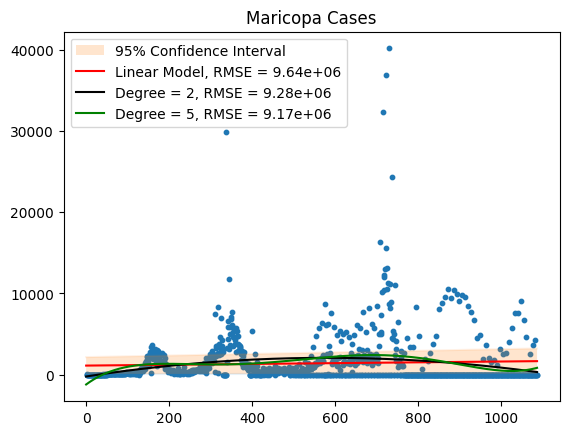

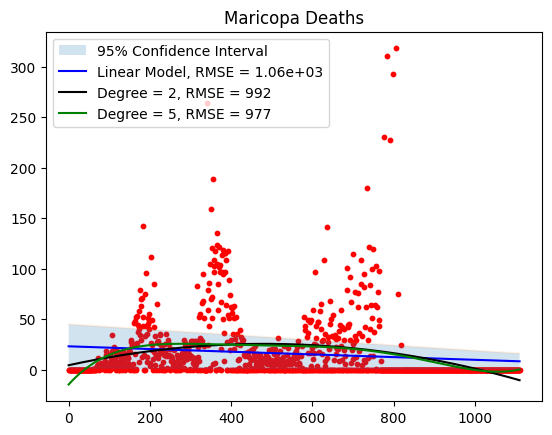

In [14]:
#Maricopa Cases Linear and Nonlinear Regression Models
xCases = Maricase_data.reshape((-1, 1))
yCases = NewMari_Cases

MariCmodel = LinearRegression().fit(xCases, yCases)
MariC1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xCases)
MariC2 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xCases)
MariCmodel1 = LinearRegression().fit(MariC1, yCases)
MariCmodel2 = LinearRegression().fit(MariC2, yCases)
y_pred = MariCmodel.predict(xCases)
y_pred1 = MariCmodel1.predict(MariC1)
y_pred2 = MariCmodel2.predict(MariC2)
x_test = np.linspace(0, 1087, 1087)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "red", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(MariCmodel.predict(xCases), yCases)))
plt.plot(x_test.ravel(), y_pred1, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(MariCmodel1.predict(MariC1), yCases)))
plt.plot(x_test.ravel(), y_pred2, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(MariCmodel2.predict(MariC2), yCases)))
plt.title("Maricopa Cases")
plt.legend()
plt.show()

#Maricopa Deaths Linear and Nonlinear Regression Models
xDeaths = Marideath_data.reshape((-1, 1))
yDeaths = NewMari_Deaths

MariD3 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xDeaths)
MariD4 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xDeaths)
MariDmodel = LinearRegression().fit(xDeaths, yDeaths)
MariDmodel3 = LinearRegression().fit(MariD3, yDeaths)
MariDmodel4 = LinearRegression().fit(MariD4, yDeaths)
y_pred = MariDmodel.predict(xDeaths)
y_pred3 = MariDmodel3.predict(MariD3)
y_pred4 = MariDmodel4.predict(MariD4)
x_test = np.linspace(0, 1110, 1110)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "blue", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(MariDmodel.predict(xDeaths), yDeaths)))
plt.plot(x_test.ravel(), y_pred3, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(MariDmodel3.predict(MariD3), yDeaths)))
plt.plot(x_test.ravel(), y_pred4, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(MariDmodel4.predict(MariD4), yDeaths)))
plt.title("Maricopa Deaths")
plt.legend()
plt.show()

The trend for new cases in Maricopa seems to have had a small raise at the start of the infection and near 600 days after the initial infection. Afterwards, there was a decrease in new cases a little after 800 days after the initial infection.

For new deaths, there was a raise in the beginning, but afterwards, there was a slow and steady decrease.

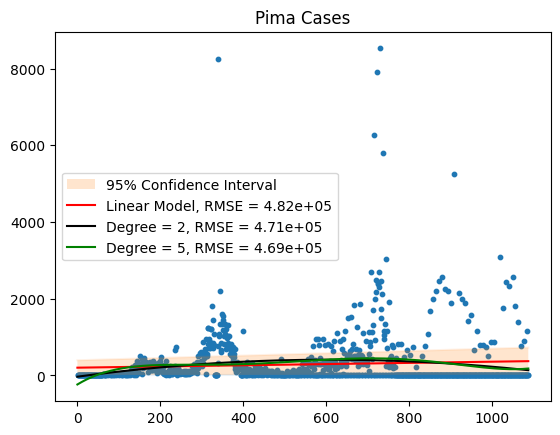

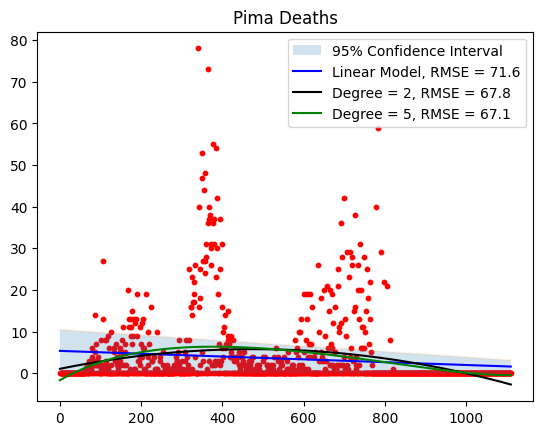

In [15]:
#Pima Cases Linear and Nonlinear Regression Models
xCases = Pimacase_data.reshape((-1, 1))
yCases = NewPima_Cases

PimaCmodel = LinearRegression().fit(xCases, yCases)
PimaC1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xCases)
PimaC2 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xCases)
PimaCmodel1 = LinearRegression().fit(PimaC1, yCases)
PimaCmodel2 = LinearRegression().fit(PimaC2, yCases)
y_pred = PimaCmodel.predict(xCases)
y_pred1 = PimaCmodel1.predict(PimaC1)
y_pred2 = PimaCmodel2.predict(PimaC2)
x_test = np.linspace(0, 1087, 1087)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "red", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(PimaCmodel.predict(xCases), yCases)))
plt.plot(x_test.ravel(), y_pred1, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(PimaCmodel1.predict(PimaC1), yCases)))
plt.plot(x_test.ravel(), y_pred2, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(PimaCmodel2.predict(PimaC2), yCases)))
plt.title("Pima Cases")
plt.legend()
plt.show()

#Pima Deaths Linear and Nonlinear Regression Models
xDeaths = Pimadeath_data.reshape((-1, 1))
yDeaths = NewPima_Deaths

PimaD3 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xDeaths)
PimaD4 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xDeaths)
PimaDmodel = LinearRegression().fit(xDeaths, yDeaths)
PimaDmodel3 = LinearRegression().fit(PimaD3, yDeaths)
PimaDmodel4 = LinearRegression().fit(PimaD4, yDeaths)
y_pred = PimaDmodel.predict(xDeaths)
y_pred3 = PimaDmodel3.predict(PimaD3)
y_pred4 = PimaDmodel4.predict(PimaD4)
x_test = np.linspace(0, 1110, 1110)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "blue", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(PimaDmodel.predict(xDeaths), yDeaths)))
plt.plot(x_test.ravel(), y_pred3, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(PimaDmodel3.predict(PimaD3), yDeaths)))
plt.plot(x_test.ravel(), y_pred4, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(PimaDmodel4.predict(PimaD4), yDeaths)))
plt.title("Pima Deaths")
plt.legend()
plt.show()

The trend of new cases in Pima had a slow and steady raise over the course of 600-700 days after the initial infection, but afterwards, it shows a drop in the amount of cases.

For the death trends, there was a raise in the beginning with the peak amount of deaths happening around 400 days after the initial infection, but afterwards, there was a slow and steady decrease in the number of deaths.

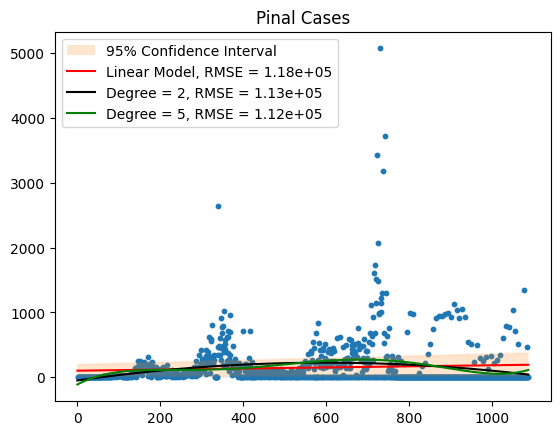

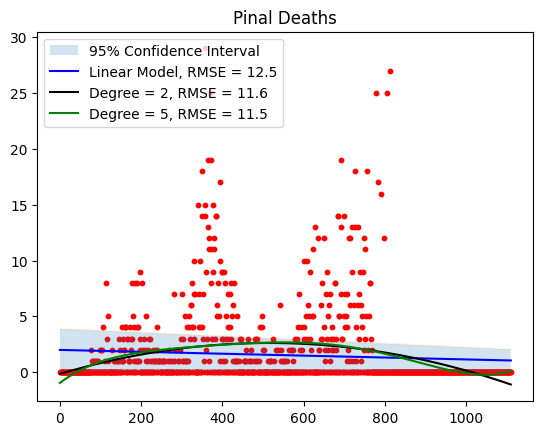

In [16]:
#Pinal Cases Linear and Nonlinear Regression Models
xCases = Pinalcase_data.reshape((-1, 1))
yCases = NewPinal_Cases

PinalCmodel = LinearRegression().fit(xCases, yCases)
PinalC1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xCases)
PinalC2 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xCases)
PinalCmodel1 = LinearRegression().fit(PinalC1, yCases)
PinalCmodel2 = LinearRegression().fit(PinalC2, yCases)
y_pred = PinalCmodel.predict(xCases)
y_pred1 = PinalCmodel1.predict(PinalC1)
y_pred2 = PinalCmodel2.predict(PinalC2)
x_test = np.linspace(0, 1087, 1087)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "red", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(PinalCmodel.predict(xCases), yCases)))
plt.plot(x_test.ravel(), y_pred1, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(PinalCmodel1.predict(PinalC1), yCases)))
plt.plot(x_test.ravel(), y_pred2, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(PinalCmodel2.predict(PinalC2), yCases)))
plt.title("Pinal Cases")
plt.legend()
plt.show()

#Pinal Deaths Linear and Nonlinear Regression Models
xDeaths = Pinaldeath_data.reshape((-1, 1))
yDeaths = NewPinal_Deaths

PinalD3 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xDeaths)
PinalD4 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xDeaths)
PinalDmodel = LinearRegression().fit(xDeaths, yDeaths)
PinalDmodel3 = LinearRegression().fit(PinalD3, yDeaths)
PinalDmodel4 = LinearRegression().fit(PinalD4, yDeaths)
y_pred = PinalDmodel.predict(xDeaths)
y_pred3 = PinalDmodel3.predict(PinalD3)
y_pred4 = PinalDmodel4.predict(PinalD4)
x_test = np.linspace(0, 1110, 1110)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "blue", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(PinalDmodel.predict(xDeaths), yDeaths)))
plt.plot(x_test.ravel(), y_pred3, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(PinalDmodel3.predict(PinalD3), yDeaths)))
plt.plot(x_test.ravel(), y_pred4, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(PinalDmodel4.predict(PinalD4), yDeaths)))
plt.title("Pinal Deaths")
plt.legend()
plt.show()

The trend for new Pinal cases shows a slow raise with an eventual peak at around 700 days after the initial infection and then a decrease right afterwards.

The trend new Pinal deaths shows more of a rounded curve with raising deaths up to around 500 days after initial infections and then a fall in the amount of new deaths afterwards.

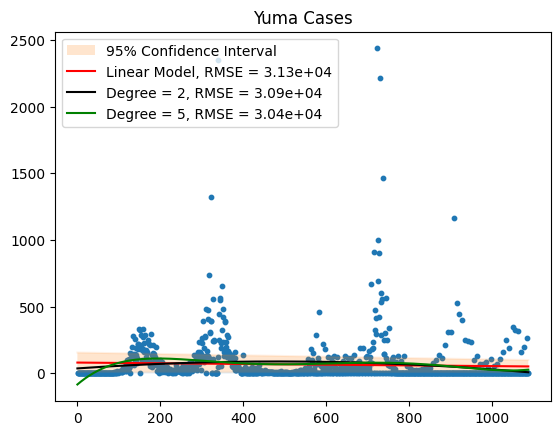

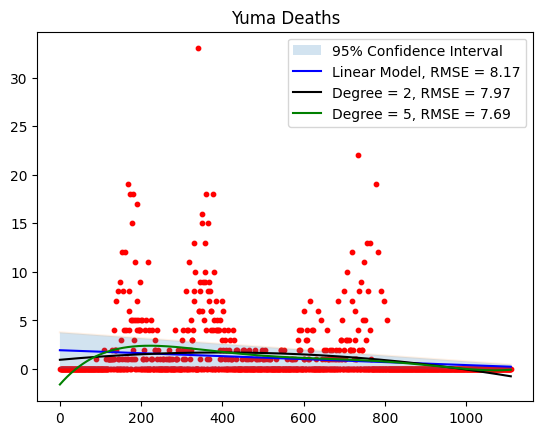

In [17]:
#Yuma Cases Linear and Nonlinear Regression Models
xCases = Yumacase_data.reshape((-1, 1))
yCases = NewYuma_Cases

YumaCmodel = LinearRegression().fit(xCases, yCases)
YumaC1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xCases)
YumaC2 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xCases)
YumaCmodel1 = LinearRegression().fit(YumaC1, yCases)
YumaCmodel2 = LinearRegression().fit(YumaC2, yCases)
y_pred = YumaCmodel.predict(xCases)
y_pred1 = YumaCmodel1.predict(YumaC1)
y_pred2 = YumaCmodel2.predict(YumaC2)
x_test = np.linspace(0, 1087, 1087)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "red", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(YumaCmodel.predict(xCases), yCases)))
plt.plot(x_test.ravel(), y_pred1, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(YumaCmodel1.predict(YumaC1), yCases)))
plt.plot(x_test.ravel(), y_pred2, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(YumaCmodel2.predict(YumaC2), yCases)))
plt.title("Yuma Cases")
plt.legend()
plt.show()

#Yuma Deaths Linear and Nonlinear Regression Models
xDeaths = Yumadeath_data.reshape((-1, 1))
yDeaths = NewYuma_Deaths

YumaD3 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xDeaths)
YumaD4 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xDeaths)
YumaDmodel = LinearRegression().fit(xDeaths, yDeaths)
YumaDmodel3 = LinearRegression().fit(YumaD3, yDeaths)
YumaDmodel4 = LinearRegression().fit(YumaD4, yDeaths)
y_pred = YumaDmodel.predict(xDeaths)
y_pred3 = YumaDmodel3.predict(YumaD3)
y_pred4 = YumaDmodel4.predict(YumaD4)
x_test = np.linspace(0, 1110, 1110)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "blue", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(YumaDmodel.predict(xDeaths), yDeaths)))
plt.plot(x_test.ravel(), y_pred3, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(YumaDmodel3.predict(YumaD3), yDeaths)))
plt.plot(x_test.ravel(), y_pred4, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(YumaDmodel4.predict(YumaD4), yDeaths)))
plt.title("Yuma Deaths")
plt.legend()
plt.show()

Yuma's trend showed a continual raise in new cases up until around 600-700 days after initial infections. Afterwards, around 800 days, the trend showed a decrease in the amount of new cases.

For the new deaths, there was a raise between the inital infection and around 200 days after it, but after that, there was a slow decline on the number of new deaths.

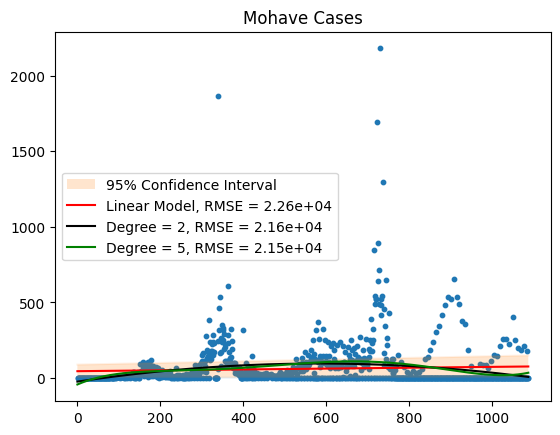

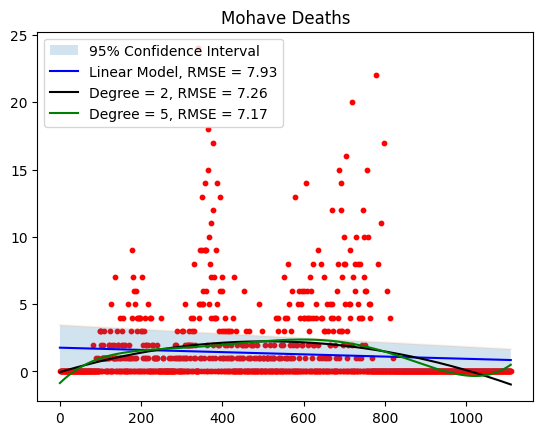

In [18]:
#Mohave Cases Linear and Nonlinear Regression Models
xCases = Mohavecase_data.reshape((-1, 1))
yCases = NewMohave_Cases

MohaveCmodel = LinearRegression().fit(xCases, yCases)
MohaveC1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xCases)
MohaveC2 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xCases)
MohaveCmodel1 = LinearRegression().fit(MohaveC1, yCases)
MohaveCmodel2 = LinearRegression().fit(MohaveC2, yCases)
y_pred = MohaveCmodel.predict(xCases)
y_pred1 = MohaveCmodel1.predict(MohaveC1)
y_pred2 = MohaveCmodel2.predict(MohaveC2)
x_test = np.linspace(0, 1087, 1087)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "red", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(MohaveCmodel.predict(xCases), yCases)))
plt.plot(x_test.ravel(), y_pred1, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(MohaveCmodel1.predict(MohaveC1), yCases)))
plt.plot(x_test.ravel(), y_pred2, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(MohaveCmodel2.predict(MohaveC2), yCases)))
plt.title("Mohave Cases")
plt.legend()
plt.show()

#Mohave Deaths Linear and Nonlinear Regression Models
xDeaths = Mohavedeath_data.reshape((-1, 1))
yDeaths = NewMohave_Deaths

MohaveD3 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xDeaths)
MohaveD4 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(xDeaths)
MohaveDmodel = LinearRegression().fit(xDeaths, yDeaths)
MohaveDmodel3 = LinearRegression().fit(MohaveD3, yDeaths)
MohaveDmodel4 = LinearRegression().fit(MohaveD4, yDeaths)
y_pred = MohaveDmodel.predict(xDeaths)
y_pred3 = MohaveDmodel3.predict(MohaveD3)
y_pred4 = MohaveDmodel4.predict(MohaveD4)
x_test = np.linspace(0, 1110, 1110)[:, None]
error = 0.95*y_pred
lower = y_pred - error
upper = y_pred + error

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test, lower, alpha=0.1)
plt.plot(x_test, upper, alpha=0.1)
plt.fill_between(x_test.ravel(), lower, upper, alpha=0.2, label='95% Confidence Interval')
plt.plot(x_test, y_pred, color = "blue", label='Linear Model, RMSE = {0:.3g}'.format(mean_squared_error(MohaveDmodel.predict(xDeaths), yDeaths)))
plt.plot(x_test.ravel(), y_pred3, c ="black", label='Degree = 2, RMSE = {0:.3g}'.format(mean_squared_error(MohaveDmodel3.predict(MohaveD3), yDeaths)))
plt.plot(x_test.ravel(), y_pred4, c ="green", label='Degree = 5, RMSE = {0:.3g}'.format(mean_squared_error(MohaveDmodel4.predict(MohaveD4), yDeaths)))
plt.title("Mohave Deaths")
plt.legend()
plt.show()

For Mohave, the trend of new cases showed a slow raise in new cases that peaked around 600 days. Then, it began to fall in numbers around the 700 days.

For the new deaths, it had a gradual and large raise that peaked at around 600 days. After that, the numbers fell at around 700 days.

Testing Hypnotheses

1. Does more establishments in a given area cause a higher chance of new covid cases?
2. Does higher wages lead to more new cases as people spend more time working around others?
3. Does a higher employment level lead to increased risk of new cases?

In [19]:
em = pd.read_csv("2022.q1-q3.singlefile.csv")
employ = em[em.area_fips == 4000] #For Arizona
employ_data = employ.drop(employ.columns[[0, 1, 2, 3, 4, 5, 7, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]], axis=1)
super_employ = employ_data[employ_data['qtr'] == 3]
super_employ['3rd qtr_emplvl'] = super_employ['month1_emplvl'] + super_employ['month2_emplvl'] + super_employ['month3_emplvl']
super_employ

C:\Users\andyl\AppData\Local\Temp\ipykernel_24200\2075362044.py:1: DtypeWarning: Columns (0,7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  em = pd.read_csv("2022.q1-q3.singlefile.csv")
C:\Users\andyl\AppData\Local\Temp\ipykernel_24200\2075362044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_employ['3rd qtr_emplvl'] = super_employ['month1_emplvl'] + super_employ['month2_emplvl'] + super_employ['month3_emplvl']


,qtr,qtrly_estabs,month1_emplvl,month2_emplvl,month3_emplvl,total_qtrly_wages,3rd qtr_emplvl
250685,3,205366,2975010,3058749,3080570,49425515718,9114329
250688,3,767,56378,56690,56541,1259781707,169609
250691,3,767,56378,56690,56541,1259781707,169609
250694,3,277,10479,10383,10391,185617549,31253
250697,3,2,9,8,7,104778,24
...,...,...,...,...,...,...,...
259310,3,9428,12293,14693,16673,223337057,43659
259313,3,9428,12293,14693,16673,223337057,43659
259316,3,9428,12293,14693,16673,223337057,43659
259319,3,9428,12293,14693,16673,223337057,43659


In [20]:
#Getting 3rd QTR of 2022

k = []
for i in range(4, len(Arizona.keys()) - 1):
    if int(Arizona.keys()[i][5:7]) < 7 or int(Arizona.keys()[i][5:7]) > 9:
        k.append(i)

for i in range(4, len(Arizona.keys()) - 1):
    if int(Arizona.keys()[i][:4]) != 2022:
        k.append(i)

k.remove(894)
k.remove(1985)
Arizona = Arizona.drop(Arizona.columns[k], axis = 1)
Arizona


,countyFIPS,County Name,State,StateFIPS,"2022-06-30,1cases","2022-07-01,1cases","2022-07-02,1cases","2022-07-03,1cases","2022-07-04,1cases","2022-07-05,1cases",...,"2022-09-22,2deaths","2022-09-23,2deaths","2022-09-24,2deaths","2022-09-25,2deaths","2022-09-26,2deaths","2022-09-27,2deaths","2022-09-28,2deaths","2022-09-29,2deaths","2022-09-30,2deaths",population
96,4001,Apache County,AZ,4,23720,23720,23720,23720,23720,23720,...,608,608,608,608,608,608,608,608,608,71887
97,4003,Cochise County,AZ,4,33235,33235,33235,33235,33235,33235,...,564,564,564,564,564,564,564,564,564,125922
98,4005,Coconino County,AZ,4,46312,46312,46312,46312,46312,46312,...,472,472,472,472,472,472,472,472,472,143476
99,4007,Gila County,AZ,4,17943,17943,17943,17943,17943,17943,...,379,379,379,379,379,379,379,379,379,54018
100,4009,Graham County,AZ,4,12288,12288,12288,12288,12288,12288,...,176,176,176,176,176,176,176,176,176,38837
101,4011,Greenlee County,AZ,4,2272,2272,2272,2272,2272,2272,...,32,32,32,32,32,32,32,32,32,9498
102,4012,La Paz County,AZ,4,5407,5407,5407,5407,5407,5407,...,143,143,143,143,143,143,143,143,143,21108
103,4013,Maricopa County,AZ,4,1345286,1345286,1345286,1345286,1345286,1345286,...,17103,17103,17103,17103,17103,17103,17103,17103,17103,4485414
104,4015,Mohave County,AZ,4,59750,59750,59750,59750,59750,59750,...,1435,1435,1435,1435,1435,1435,1435,1435,1435,212181
105,4017,Navajo County,AZ,4,40066,40066,40066,40066,40066,40066,...,902,902,902,902,902,902,902,902,902,110924
